In [61]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt


In [76]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {j: i for i, j in enumerate(self.classes)}
        self.samples = []
        self.class_counts = {}  # Dictionary to hold the counts

        for class_ in self.classes:
            class_dir = os.path.join(root_dir, class_)
            count = 0  # Initialize count for this class
            if class_=='.DS_Store':
                continue
            for id_dir in os.listdir(class_dir):
                id_dir_path = os.path.join(class_dir, id_dir)
                if os.path.isdir(id_dir_path):  # Make sure id_dir_path is a directory
                    images = []
                    for img_name in os.listdir(id_dir_path):
                        img_path = os.path.join(id_dir_path, img_name)
                        if os.path.isfile(img_path) and img_name.lower().endswith(('.tiff')):  # Make sure img_path is a file
                            images.append(img_path)
                    if images:  # if list of images is not empty
                        self.samples.append((images, self.class_to_idx[class_]))
                        count += 1  # Increment count for this class
            self.class_counts[class_] = count  # Store count for this class

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_files, label = self.samples[idx]
        images = []
        for image_file in image_files:
            image = Image.open(image_file)
            if self.transform:
                image = self.transform(image)
            images.append(image)
        return images, label

    def get_class_counts(self):
        return self.class_counts

In [77]:
# Create dataset
dataset = CustomImageDataset(root_dir='/Users/ezermoysis/Documents/UCL/Year end project/Malaria/Malaria-Detection-in-Blood-Samples/Red_Cell_Morphology 2', transform=transforms.ToTensor())

# Create data loader
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [78]:
# Get counts
counts = dataset.get_class_counts()
print(counts)

{'sma': 33, 'non-sma': 97}


In [80]:
#SMA is assigned label 1 and non-SMA is assigned label 0
for i, (images, label) in enumerate(dataset):
    print(f"Bag ID: {i+1}, Class: {'SMA' if label==1 else 'non-SMA'}, Number of images: {len(images)}")

1
Bag ID: 1, Class: non-SMA, Number of images: 5
1
Bag ID: 2, Class: non-SMA, Number of images: 8
1
Bag ID: 3, Class: non-SMA, Number of images: 12
1
Bag ID: 4, Class: non-SMA, Number of images: 10
1
Bag ID: 5, Class: non-SMA, Number of images: 7
1
Bag ID: 6, Class: non-SMA, Number of images: 10
1
Bag ID: 7, Class: non-SMA, Number of images: 5
1
Bag ID: 8, Class: non-SMA, Number of images: 8
1
Bag ID: 9, Class: non-SMA, Number of images: 10
1
Bag ID: 10, Class: non-SMA, Number of images: 5
1
Bag ID: 11, Class: non-SMA, Number of images: 10
1
Bag ID: 12, Class: non-SMA, Number of images: 5
1
Bag ID: 13, Class: non-SMA, Number of images: 10
1
Bag ID: 14, Class: non-SMA, Number of images: 10
1
Bag ID: 15, Class: non-SMA, Number of images: 10
1
Bag ID: 16, Class: non-SMA, Number of images: 7
1
Bag ID: 17, Class: non-SMA, Number of images: 10
1
Bag ID: 18, Class: non-SMA, Number of images: 9
1
Bag ID: 19, Class: non-SMA, Number of images: 10
1
Bag ID: 20, Class: non-SMA, Number of images: 6

Bag 1, Class: non-SMA, Number of images: 1


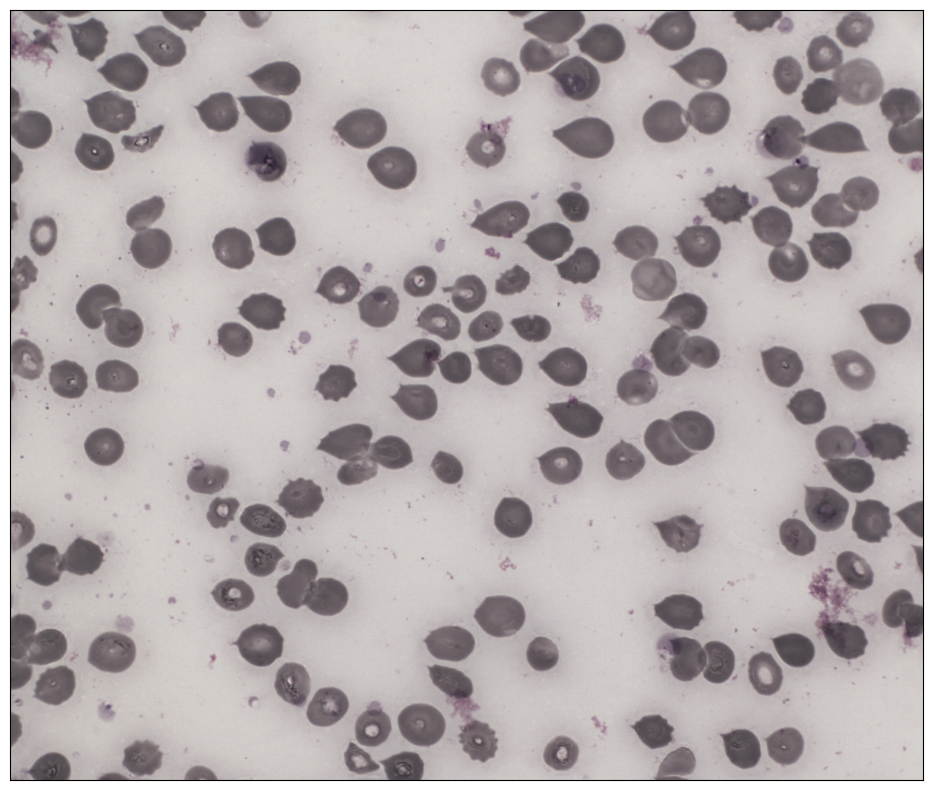

Bag 2, Class: non-SMA, Number of images: 1


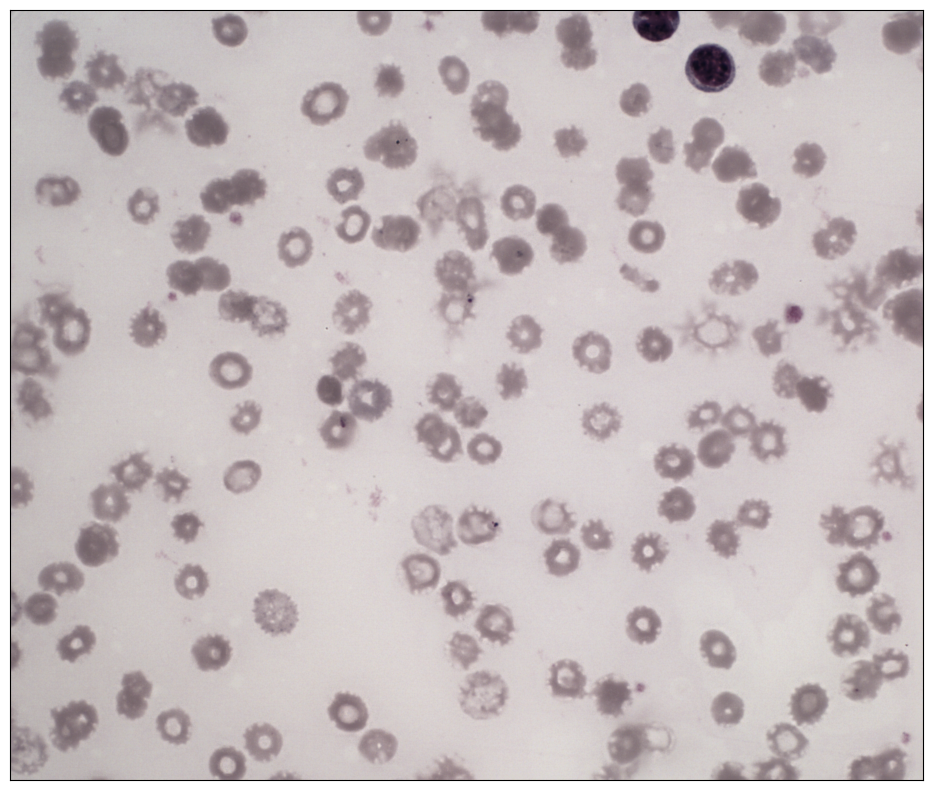

Bag 3, Class: non-SMA, Number of images: 1


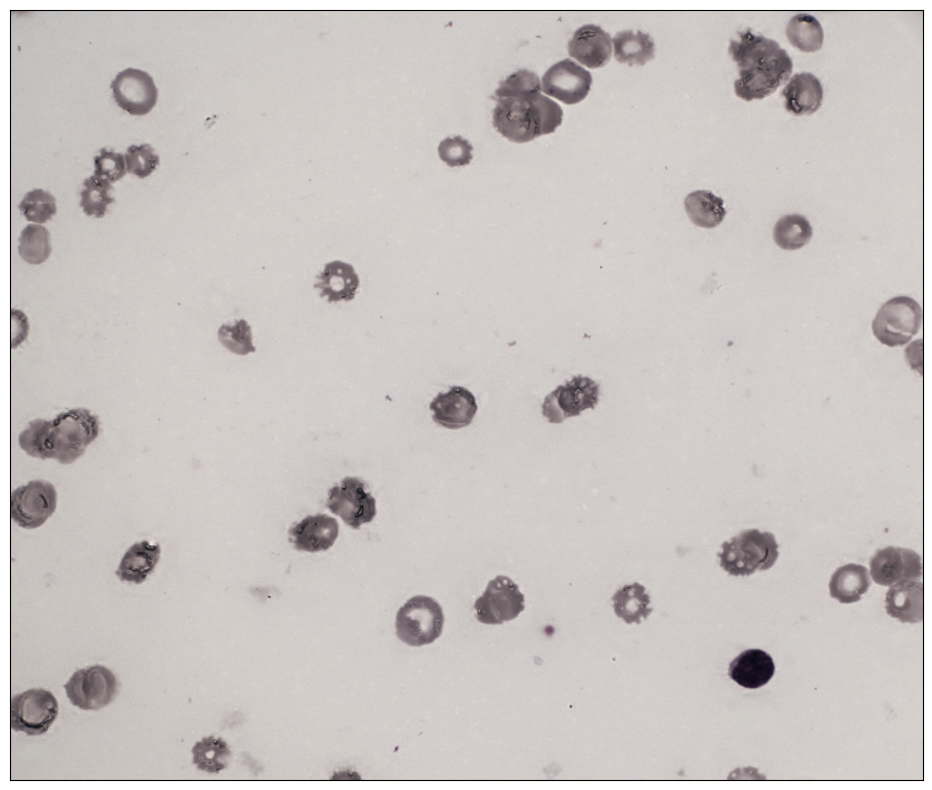

Bag 4, Class: non-SMA, Number of images: 1


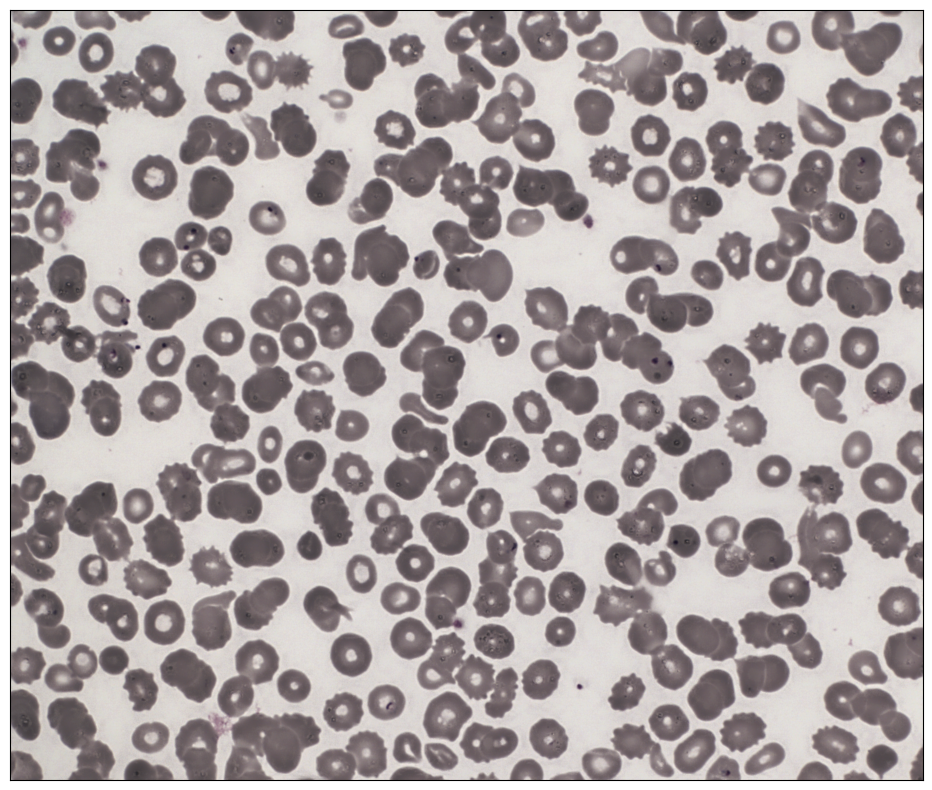

Bag 5, Class: non-SMA, Number of images: 1


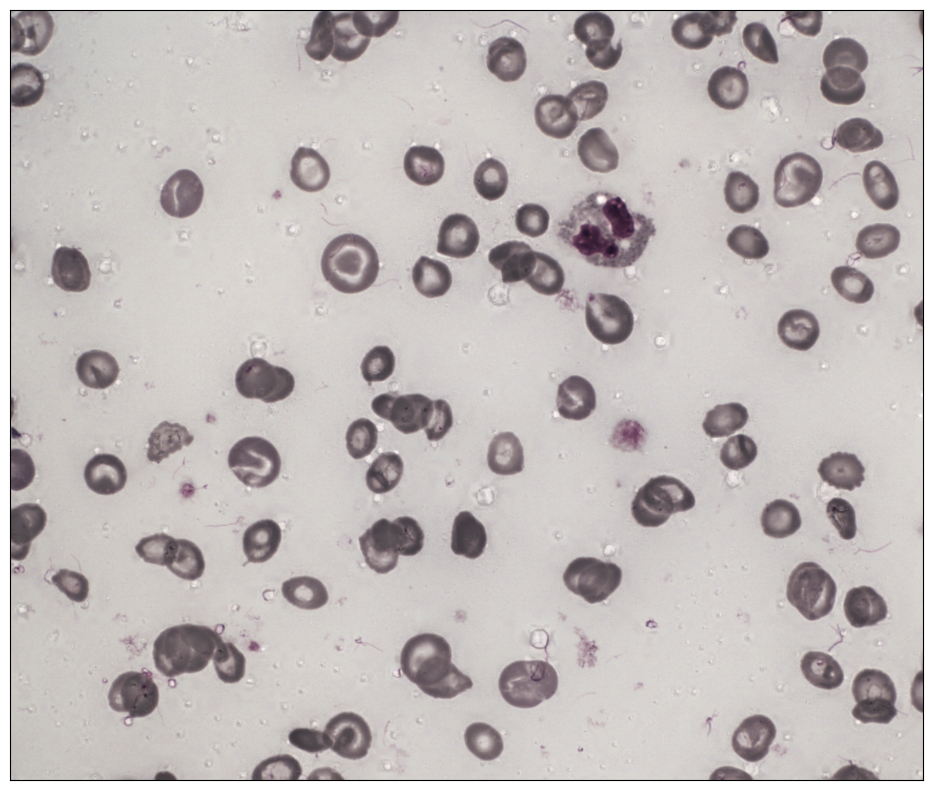

In [66]:
# Iterate through the data loader
for i, (images, label) in enumerate(data_loader):
    # We'll only look at the first few bags
    if i == 5:
        break

    print(f"Bag {i+1}, Class: {'SMA' if label[0]==1 elif label[0]==2 'non-SMA'}, Number of images: {len(images[0])}")
    
    # Display all images from each bag
    fig = plt.figure(figsize=(20, 10))  # adjust size as needed
    for j in range(len(images[0])):
        ax = fig.add_subplot(1, len(images[0]), j+1, xticks=[], yticks=[])
        img = images[0][j].permute(1, 2, 0)  # permute dimensions to (height, width, channels)
        ax.imshow(img)
    plt.show()


In [81]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.samples = []
        self.class_counts = {}

        for class_ in self.class_to_idx.keys():
            class_dir = os.path.join(root_dir, class_)
            count = 0
            for id_dir in os.listdir(class_dir):
                id_dir_path = os.path.join(class_dir, id_dir)
                if os.path.isdir(id_dir_path):  
                    images = []
                    for img_name in os.listdir(id_dir_path):
                        img_path = os.path.join(id_dir_path, img_name)
                        if os.path.isfile(img_path) and img_name.lower().endswith(('.tiff')):  
                            images.append(img_path)
                    if images:  
                        self.samples.append((images, self.class_to_idx[class_]))
                        count += 1  
            self.class_counts[class_] = count 

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        print(label)
        image_files, label = self.samples[idx]
        images = []
        for image_file in image_files:
            image = Image.open(image_file)
            if self.transform:
                image = self.transform(image)
            images.append(image)
        return images, label

    def get_class_counts(self):
        return self.class_counts


In [90]:
class_to_idx = {'sma': 1, 'non-sma': 0}

# Get current directory
current_directory = os.getcwd()

# Relative directory of images
other_string = "Red_Cell_Morphology 2/"

# Combine directpries
new_path = os.path.join(current_directory, other_string)

# Create dataset
dataset = CustomImageDataset(root_dir=new_path, class_to_idx=class_to_idx, transform=transforms.ToTensor())

# Create data loader
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [91]:
# Get counts
counts = dataset.get_class_counts()
print(counts)

{'sma': 33, 'non-sma': 97}


In [92]:
#SMA is assigned label 1 and non-SMA is assigned label 0
for i, (images, label) in enumerate(dataset):
    print(f"Bag ID: {i+1}, Class: {'SMA' if label==1 else 'non-SMA'}, Number of images: {len(images)}")

Bag ID: 1, Class: SMA, Number of images: 5
Bag ID: 2, Class: SMA, Number of images: 8
Bag ID: 3, Class: SMA, Number of images: 12
Bag ID: 4, Class: SMA, Number of images: 10
Bag ID: 5, Class: SMA, Number of images: 7
Bag ID: 6, Class: SMA, Number of images: 10
Bag ID: 7, Class: SMA, Number of images: 5
Bag ID: 8, Class: SMA, Number of images: 8
Bag ID: 9, Class: SMA, Number of images: 10
Bag ID: 10, Class: SMA, Number of images: 5
Bag ID: 11, Class: SMA, Number of images: 10
Bag ID: 12, Class: SMA, Number of images: 5
Bag ID: 13, Class: SMA, Number of images: 10
Bag ID: 14, Class: SMA, Number of images: 10
Bag ID: 15, Class: SMA, Number of images: 10
Bag ID: 16, Class: SMA, Number of images: 7
Bag ID: 17, Class: SMA, Number of images: 10
Bag ID: 18, Class: SMA, Number of images: 9
Bag ID: 19, Class: SMA, Number of images: 10
Bag ID: 20, Class: SMA, Number of images: 6
Bag ID: 21, Class: SMA, Number of images: 5
Bag ID: 22, Class: SMA, Number of images: 10
Bag ID: 23, Class: SMA, Number